# **Chapter 2 - Small Worlds and Large Worlds**
# **Chapter 3 - Sampling the Imaginary**

In [1]:
import os
import sys
import warnings
module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import arviz as az
import numpy as np
import pymc3 as pm

# from matplotlib import pylab as plt
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)

# %config InlineBackend.figure_format = 'retina'
%load_ext watermark
az.style.use("arviz-darkgrid")
plt.rcParams["figure.dpi"] = 240

In [4]:
def posterior_grid_approx(n_p_grid=5, success=6, tosses=9, method='uniform'):
    
    # define the parameter grid
    p_grid = np.linspace(0, 1, n_p_grid)

    # define prior
    if method=='uniform':
        prior = np.repeat(5, n_p_grid)
    elif method=='truncated':
        prior = (p_grid >= 0.5).astype(int)
    elif method=='double_exp':
        prior = np.exp(- 5 * abs(p_grid - 0.5))

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

### **Questions**

1. Suppose the globe tossing data (Chapter 2) had turned out to be 4 water and 11 land. Construct the posterior distribution, using grid approximation. Use the same flat prior as in the book.
2. Now suppose the data are 4 water and 2 land. Compute the posterior again, but this time use a prior that is zero below $p = 0.5$ and a constant above $p = 0.5$. This corresponds to prior information that a majority of the Earth’s surface is water.
3. For the posterior distribution from 2, compute 89% percentile and HPDI intervals. Compare the widths of these intervals. Which is wider? Why? If you had only the information in the interval, what might you misunderstand about the shape of the posterior distribution?
4. Optional: Suppose there is bias in sampling so that Land is more likely than Water to be recorded. Specifically, assume that 1-in-5 (20%) of Water samples are accidentally recorded instead as ”Land”. First, write a generative simulation of this sampling process. Assuming the true proportion of Water is 0.70, what proportion does your simulation tend to produce instead? Second, using a simulated sample of 20 tosses, compute the unbiased posterior distribution of the true proportion of water.

### **Answers**

#### **1 & 2**

In [6]:
# express the above scenarios as the number of waters in each
w = np.array([4, 4])
# give the total number of trials
total = np.array([15, 6])

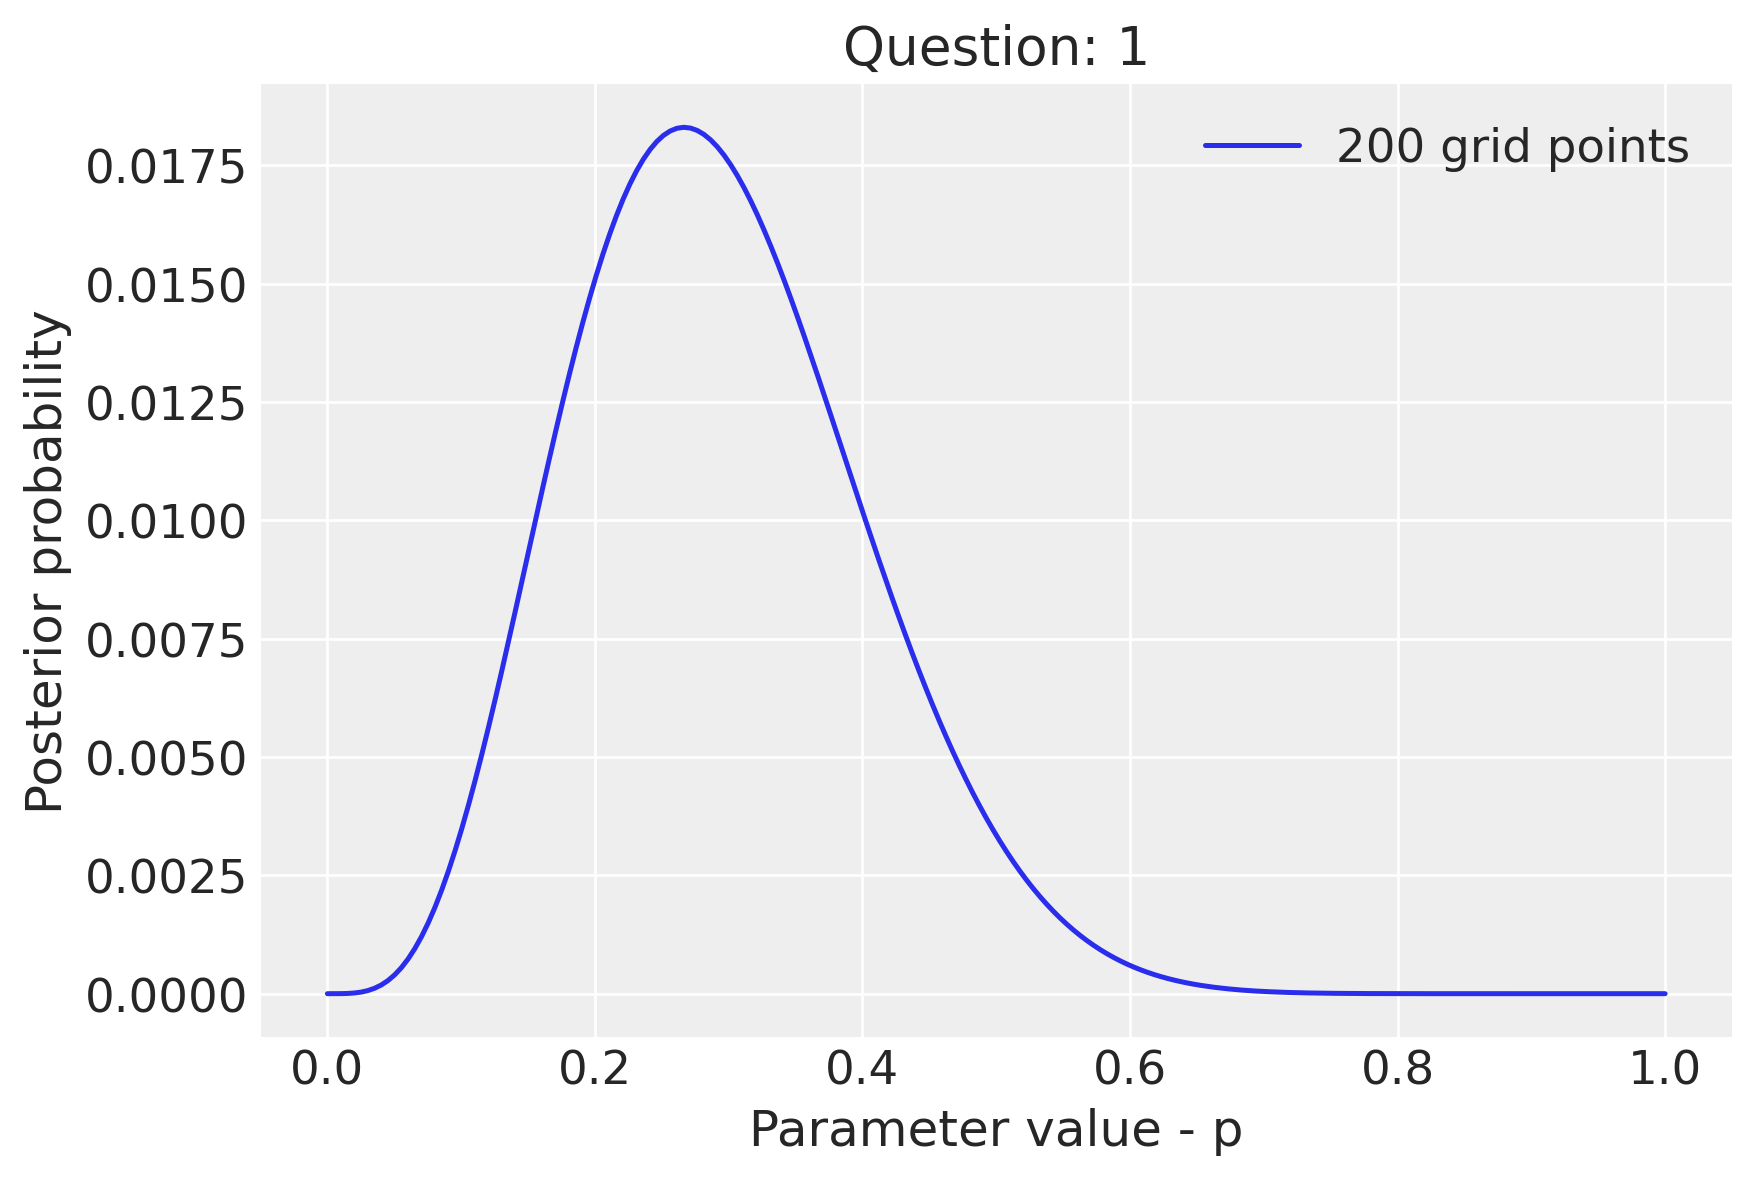

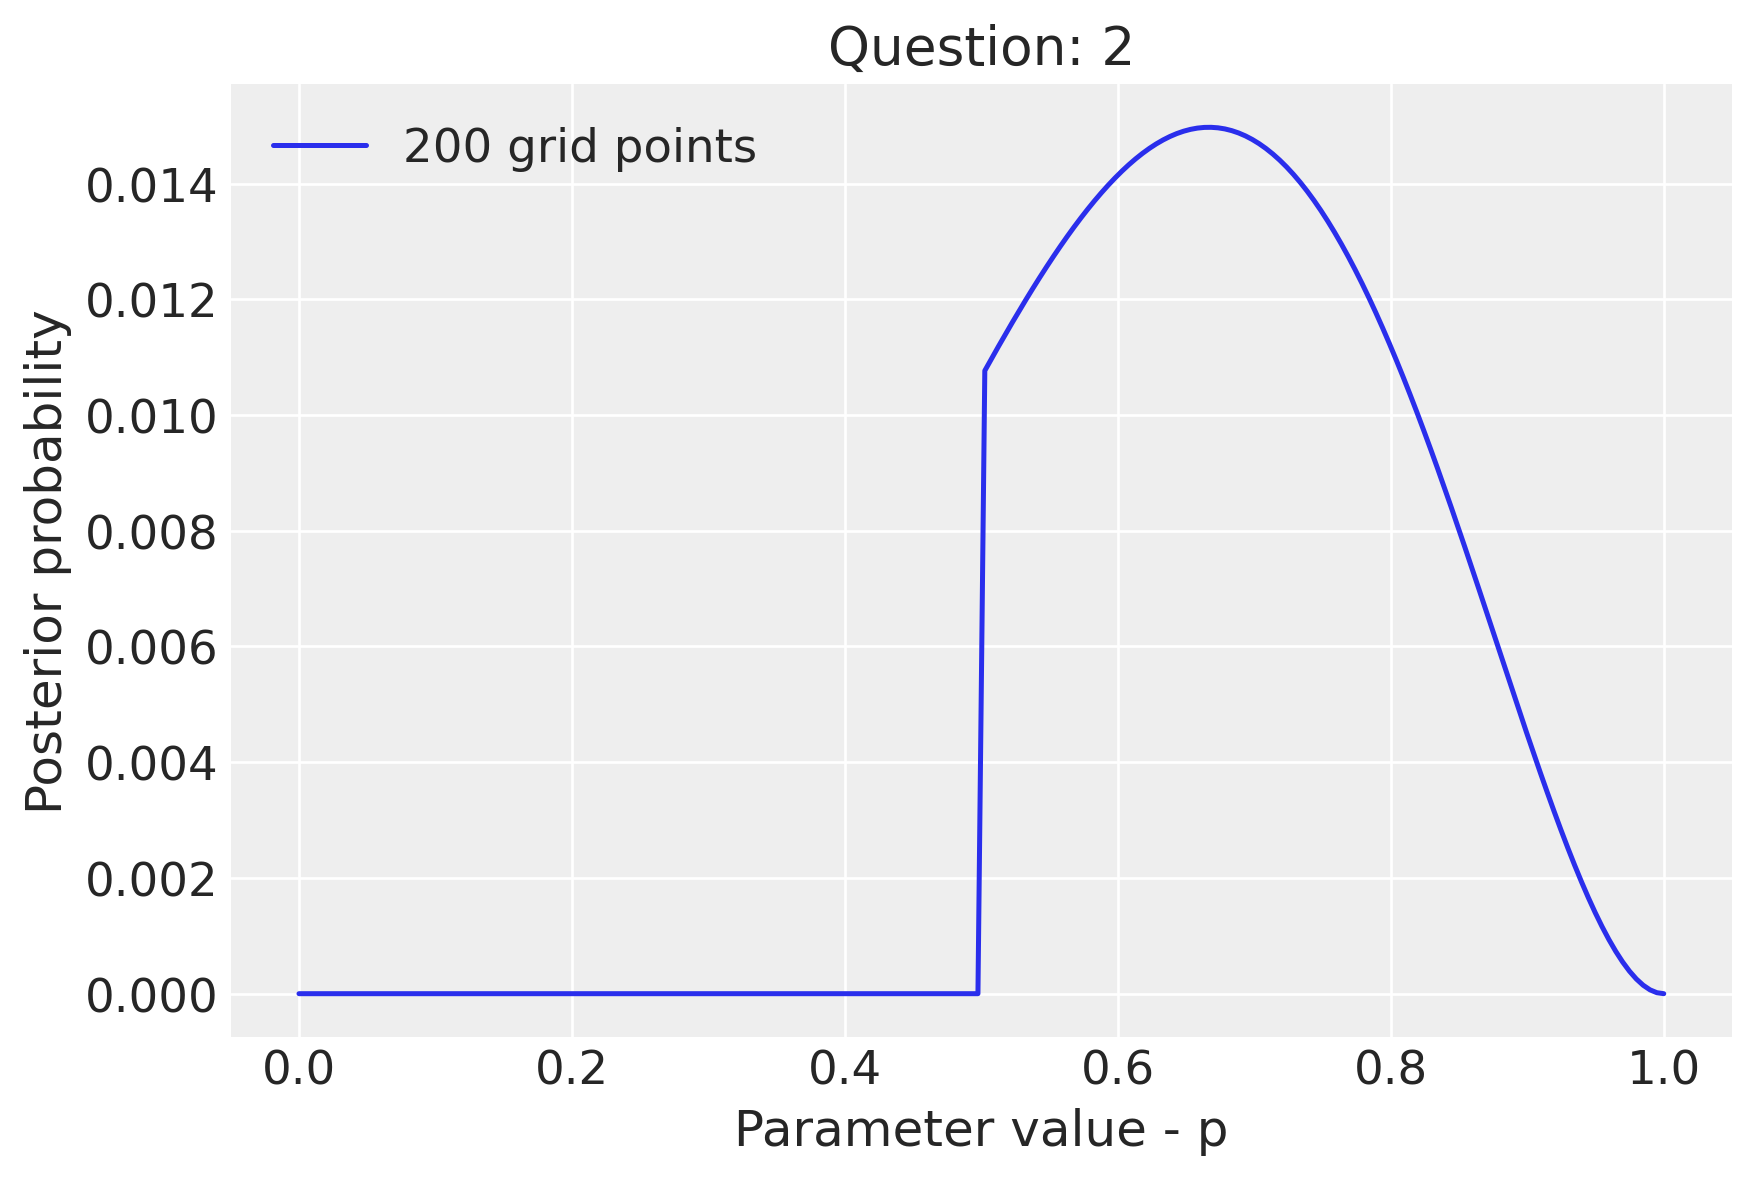

In [7]:
# Get the plots for each scenario, trying different numbers of grid points for each
for success, tosses, k in zip(w, total, range(2)):
    n_p_grid = 200
    if k == 0:
        p_grid, posterior = posterior_grid_approx(n_p_grid = n_p_grid, success=success, tosses=tosses, method='uniform')
    else:
        p_grid, posterior = posterior_grid_approx(n_p_grid = n_p_grid, success=success, tosses=tosses, method='truncated')
    plt.plot(p_grid, posterior, label=str(n_p_grid) + " grid points")
    plt.title("Question: " + str(k + 1))
    plt.xlabel("Parameter value - p")
    plt.ylabel("Posterior probability")
    plt.legend()
    plt.show()

#### **3**

In [21]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
p_i = 89
p_i_vals = np.percentile(samples, [(100-p_i)/2, p_i+(100-p_i)/2])
print(f"Range: {p_i_vals}, Difference {round(p_i_vals[1] - p_i_vals[0], 3)}")

Range: [0.52763819 0.87939698], Difference 0.352


Range: [0.50251256 0.83919598], Difference 0.337


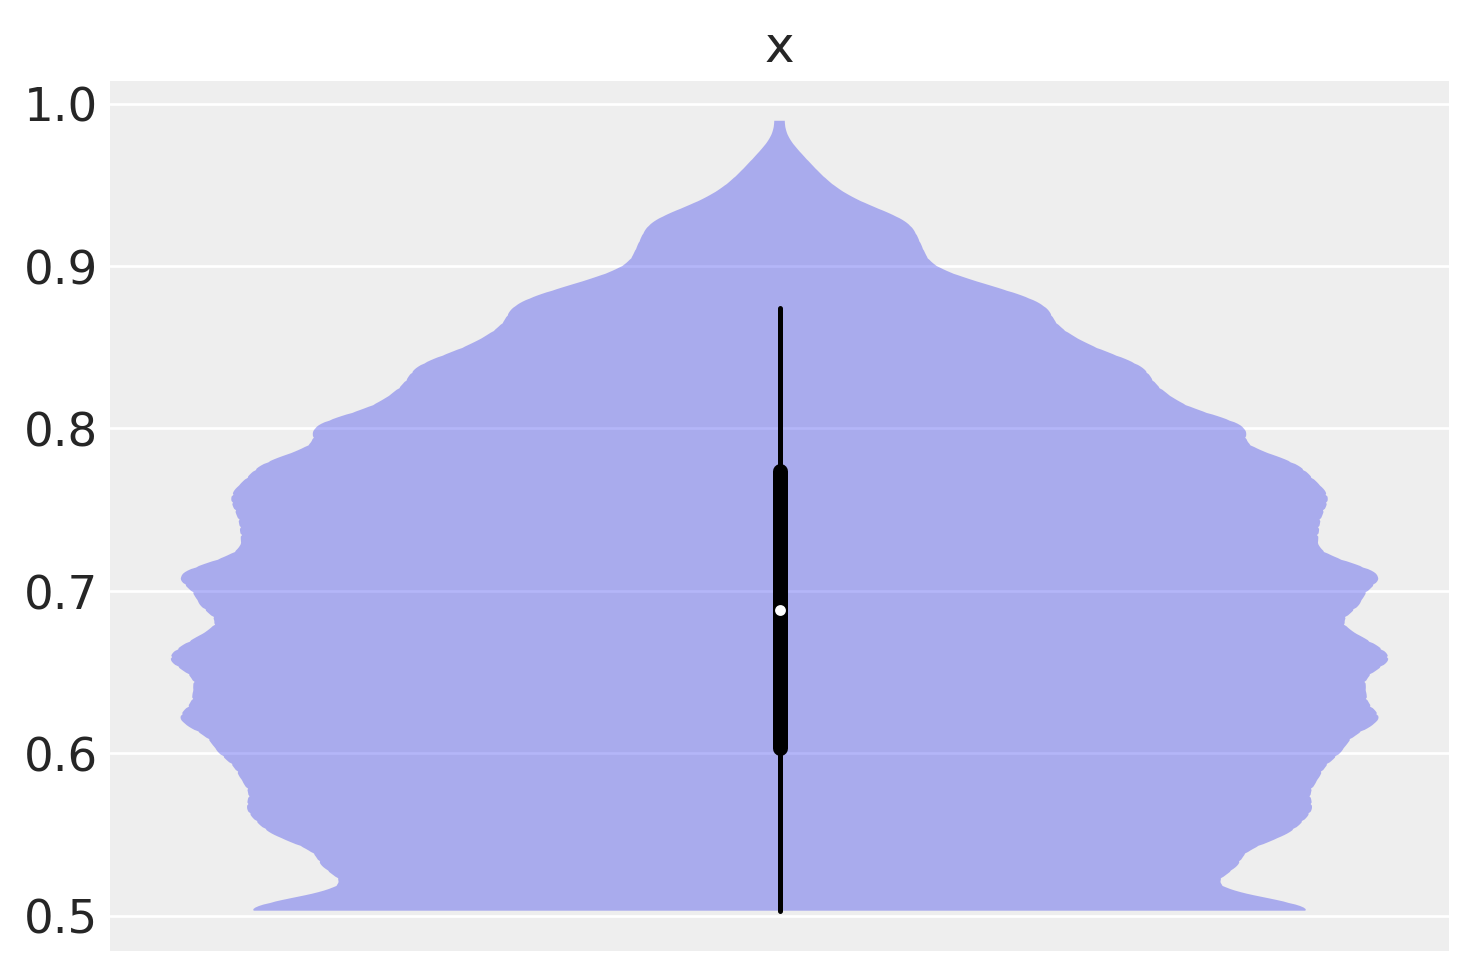

In [23]:
hd_i_vals = az.hdi(samples, hdi_prob=p_i/100)
print(f"Range: {hd_i_vals}, Difference {round(hd_i_vals[1] - hd_i_vals[0], 3)}")
az.plot_violin(samples)
plt.show()

Percentile Intervals are wider than Highest Posterior Density Intervals [HPDI]. HPDI is the narrowest interval containing the specified probability mass.

In [25]:
%watermark -n -u -v -iv -w

Last updated: Sat Mar 26 2022

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 8.1.1

scipy     : 1.7.3
matplotlib: 3.5.1
pymc3     : 3.11.5
sys       : 3.9.7 (default, Sep 16 2021, 13:09:58) 
[GCC 7.5.0]
arviz     : 0.11.4
numpy     : 1.21.2

Watermark: 2.3.0

